 **Import libraries**

In [1]:
import os
import datetime
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

**Read the csv file**

In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/nipunidevinuwara/car-price-prediction-model/main/data/train.csv")
df1.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
# display the shape of the data
df1.shape

(19237, 18)

In [4]:
#Describe the dataset
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


**Data Preprocessing**

**Check are there any null values**

In [5]:
df1.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [6]:
##check missing values
def get_missing_values(df1):
    values = {}
    for feat in df1.columns:
        if df1[feat].isna().any():
            values[feat] = round(df1[feat].mean(),2)
    return values

In [7]:
values = get_missing_values(df1)

In [8]:
values

{}

In [9]:
# remove ID column
df2 = df1.drop(['ID'], axis='columns')
df2.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [10]:
categorical = df2.select_dtypes(include = "object").columns
for i in range(0, len(categorical)):
    print(df2[categorical[i]].value_counts())
    print('****************************************\n')

Levy
-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: count, Length: 559, dtype: int64
****************************************

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64
****************************************

Model
Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: count, Length: 1590, dtype: int64
****************************************

Category
Sedan    

In [11]:
# replace "-" with 0
df2['Levy'] = df2['Levy'].replace('-', '0')
df2['Levy'] = df2['Levy'].astype(int)

In [12]:
df2

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


**Display details of dataframe**

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  int64  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [14]:
# remove 'km' word and convert into float value
df2['Mileage'] = df2['Mileage'].str.replace('km','').astype('float64')

In [15]:
# remove 'Turbo' word and convert into float value
df2['Engine volume'] = df2['Engine volume'].str.replace('Turbo','').astype('float64')

In [16]:
df2

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4


**Check correlation of Price column with other columns**

In [19]:
# Calculate correlation only for numeric columns
numeric_df = df2.select_dtypes(include=np.number)
correlation = numeric_df.corr()['Price']

print(correlation)

Price            1.000000
Levy            -0.003701
Prod. year       0.012982
Engine volume    0.008753
Mileage         -0.001758
Cylinders        0.007518
Airbags         -0.012824
Name: Price, dtype: float64


Text(0, 0.5, 'correlation')

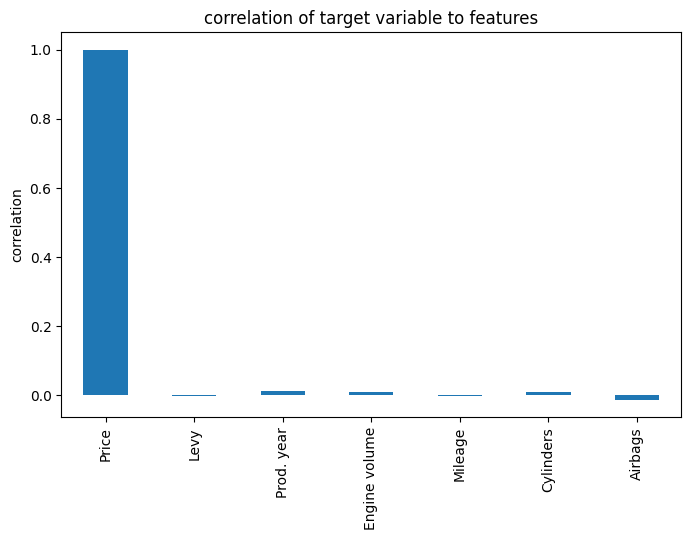

In [21]:
#Plot the graph of correlation of target variable to features

plt.figure(figsize=(8,5))
ax = numeric_df.corr()['Price'].plot(kind='bar',title='correlation of target variable to features')
ax.set_ylabel('correlation')


<Axes: title={'center': 'Correletion plot'}>

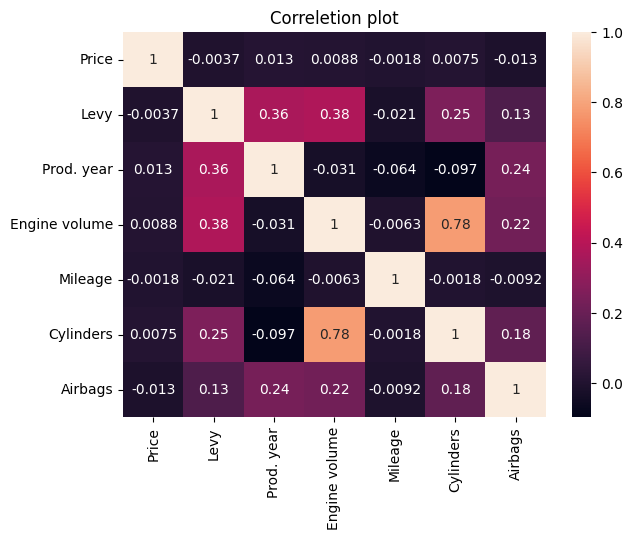

In [23]:
plt.figure(figsize=(15,5));plt.subplot(121,title = 'Correletion plot')
sns.heatmap(numeric_df.corr(),annot=True)


In [24]:
df2.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [25]:
# check the counts of each Manufacturer
df2['Manufacturer'].value_counts()

,count
Manufacturer,
HYUNDAI,3769
TOYOTA,3662
MERCEDES-BENZ,2076
FORD,1111
CHEVROLET,1069
...,...
TESLA,1
PONTIAC,1
SATURN,1


In [26]:
# check the counts of each Model
df2['Model'].value_counts()

,count
Model,
Prius,1083
Sonata,1079
Camry,938
Elantra,922
E 350,542
...,...
Feroza,1
C-MAX C-MAX,1
X1 4X4,1


In [27]:
# check the counts of each Category
df2['Category'].value_counts()

,count
Category,
Sedan,8736
Jeep,5473
Hatchback,2847
Minivan,647
Coupe,532
Universal,364
Microbus,306
Goods wagon,233
Pickup,52


In [28]:
# check the counts of each Fuel type
df2['Fuel type'].value_counts()

,count
Fuel type,
Petrol,10150
Diesel,4036
Hybrid,3578
LPG,892
CNG,494
Plug-in Hybrid,86
Hydrogen,1


In [29]:
# remove 'Fuel type' = 'Hydrogen' column
df3 = df2[df2['Fuel type'] != 'Hydrogen']

In [30]:
# check the counts of each Fuel type
df3['Fuel type'].value_counts()

,count
Fuel type,
Petrol,10150
Diesel,4036
Hybrid,3578
LPG,892
CNG,494
Plug-in Hybrid,86


In [31]:
df3.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [32]:
# Define a function to count the cars in an array
def count_the_cars(arr):
    tot = 0
    for i in arr.values:
        tot += i
    return tot

# Group the DataFrame 'df3' by 'Manufacturer' and count the occurrences of each manufacturer
manufactures_counts = df3.groupby('Manufacturer')['Manufacturer'].agg('count')

# Group the DataFrame 'df5' by 'Model' and count the occurrences of each car model
model_counts = df3.groupby('Model')['Model'].agg('count')

# Filter manufacturers with more than 10 cars
manufactures_counts_filtered = manufactures_counts[manufactures_counts > 10]

# Filter car models with 5 or fewer occurrences
model_counts_filtered = model_counts[model_counts <= 5]

In [33]:
# Extract the index values of the 'model_counts_filtered' Series and convert them to a list.
model_counts_filtered_list = model_counts_filtered.index.tolist()
print(model_counts_filtered_list)

['09-Mar', '100', '100 NX', '1111', '114', '116', '118', '118 2,0', '118 M-sport LCI', '120', '128', '128 M tech', '130', '1300', '135', '147', '1500,1600 Schtufenheck', '159', '166', '190', '20', '206', '206 CC', '207', '208', '21', '21 3.0', '2101 01', '2103 03', '2105', '2107 07', '2109', '2111', '2140', '216', '220', '225', '230', '230 W153', '24', '24 10', '240', '250', '270', '280', '290', '3.18E+38', '3.20E+38', '3.25E+48', '300 LIMITED', '3008', '3008 2.0', '307', '311', '3110', '31105', '31514 UAZ', '316', '316 1995', '316 i', '318 318', '318 m', '318 რესტაილინგი', '318 სასწრაფოდ', '320 2.0', '320 2.2', '320 320', '320 DIESEL', '320 Diesel', '320 Gran Turismo', '320 I', '320 M', '320 i', '32214', '322173', '323', '323 F', '325 CI', '325 XI', '325 i', '328 DIZEL', '328 DRIFT CAR', '328 Xdrive', '328 i', '328 sulev', '335 335i', '335 D', '335 M paket', '335 ტურბო', '340', '370Z', '3796', '400', '400X', '401', '406', '407', '416', '420', '428 Sport Line', '428 i', '435', '435 CUP

In [34]:
# This function 'add_model' checks if the 'input' matches any item in 'model_counts_filtered_list'.
# If a match is found, it returns 'Other'; otherwise, it returns the original 'input'.
def add_model(input):
  for model in model_counts_filtered_list:
    if input == model:
      return 'Other'

  return input

In [35]:
#Call the add model function
df3['Model'] = df3['Model'].apply(add_model)
df3[:]

<ipython-input-35-ac8679eec4f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Model'] = df3['Model'].apply(add_model)


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [36]:
# check the counts of each model
df3['Model'].value_counts()

,count
Model,
Other,1972
Prius,1083
Sonata,1079
Camry,938
Elantra,922
...,...
Camry sport,6
Allroad,6
Laguna,6


In [37]:
# Replace values in the 'Leather interior' column of DataFrame 'df3' based on the 'label_mapping' dictionary.
# 'Yes' is replaced with 1 and 'No' is replaced with 0.
label_mapping = {'Yes': 1, 'No': 0}
df3['Leather interior'] = df3['Leather interior'].replace(label_mapping)

<ipython-input-37-080e191fd67c>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Leather interior'] = df3['Leather interior'].replace(label_mapping)
<ipython-input-37-080e191fd67c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Leather interior'] = df3['Leather interior'].replace(label_mapping)


In [38]:
df3.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [39]:
# Replace values in the 'Drive wheels' column of DataFrame 'df3' using the 'drive_wheel' dictionary.
# '4x4' is replaced with 1, and 'Front' is replaced with 0.
drive_wheel = {'Front':0, 'Rear':1, '4x4':2}
df3['Drive wheels'] = df3['Drive wheels'].replace(drive_wheel)

<ipython-input-39-f73389a4bbbf>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Drive wheels'] = df3['Drive wheels'].replace(drive_wheel)
<ipython-input-39-f73389a4bbbf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Drive wheels'] = df3['Drive wheels'].replace(drive_wheel)


In [40]:
# Calculate the 'Lifetime' of each vehicle in the DataFrame 'df5'
# by subtracting the 'Prod. year' from the current year.
# Then, drop the 'Prod. year' column and display the first few rows of the modified DataFrame.
current_year = datetime.datetime.now().year
df3['Lifetime'] = current_year - df3['Prod. year']
df3.drop('Prod. year', axis=1, inplace=True)
df3.head()

<ipython-input-40-f901be9e589b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Lifetime'] = current_year - df3['Prod. year']
<ipython-input-40-f901be9e589b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop('Prod. year', axis=1, inplace=True)


,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Lifetime
0,13328,1399,LEXUS,RX 450,Jeep,1,Hybrid,3.5,186005.0,6.0,Automatic,2,04-May,Left wheel,Silver,12,15
1,16621,1018,CHEVROLET,Equinox,Jeep,0,Petrol,3.0,192000.0,6.0,Tiptronic,2,04-May,Left wheel,Black,8,14
2,8467,0,HONDA,FIT,Hatchback,0,Petrol,1.3,200000.0,4.0,Variator,0,04-May,Right-hand drive,Black,2,19
3,3607,862,FORD,Escape,Jeep,1,Hybrid,2.5,168966.0,4.0,Automatic,2,04-May,Left wheel,White,0,14
4,11726,446,HONDA,FIT,Hatchback,1,Petrol,1.3,91901.0,4.0,Automatic,0,04-May,Left wheel,Silver,4,11


In [41]:
# Replace values in the 'Wheel' column of DataFrame 'df3' using the 'label_mapping_wheel' dictionary.
# 'Right-hand drive' is replaced with 1, and 'Left wheel' is replaced with 0.
label_mapping_wheel = {'Right-hand drive': 1, 'Left wheel': 0}
df3['Wheel'] = df3['Wheel'].replace(label_mapping_wheel)
df3.head()

<ipython-input-41-fbc7dbce726b>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Wheel'] = df3['Wheel'].replace(label_mapping_wheel)
<ipython-input-41-fbc7dbce726b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Wheel'] = df3['Wheel'].replace(label_mapping_wheel)


,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Lifetime
0,13328,1399,LEXUS,RX 450,Jeep,1,Hybrid,3.5,186005.0,6.0,Automatic,2,04-May,0,Silver,12,15
1,16621,1018,CHEVROLET,Equinox,Jeep,0,Petrol,3.0,192000.0,6.0,Tiptronic,2,04-May,0,Black,8,14
2,8467,0,HONDA,FIT,Hatchback,0,Petrol,1.3,200000.0,4.0,Variator,0,04-May,1,Black,2,19
3,3607,862,FORD,Escape,Jeep,1,Hybrid,2.5,168966.0,4.0,Automatic,2,04-May,0,White,0,14
4,11726,446,HONDA,FIT,Hatchback,1,Petrol,1.3,91901.0,4.0,Automatic,0,04-May,0,Silver,4,11


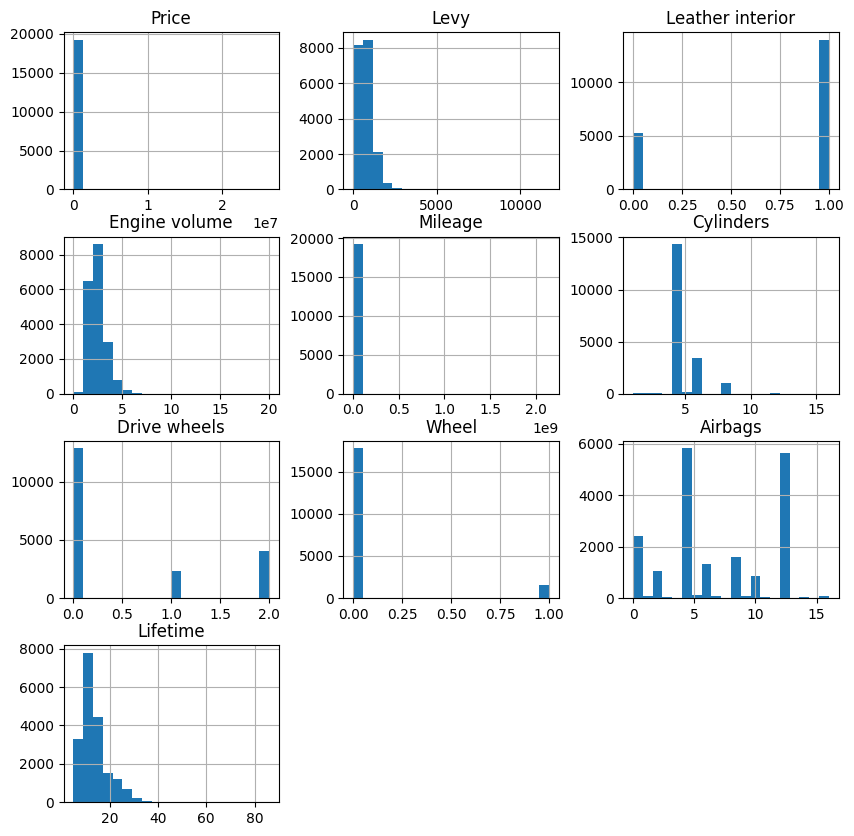

In [42]:
df3.hist(bins=20, figsize=(10, 10))
plt.show()

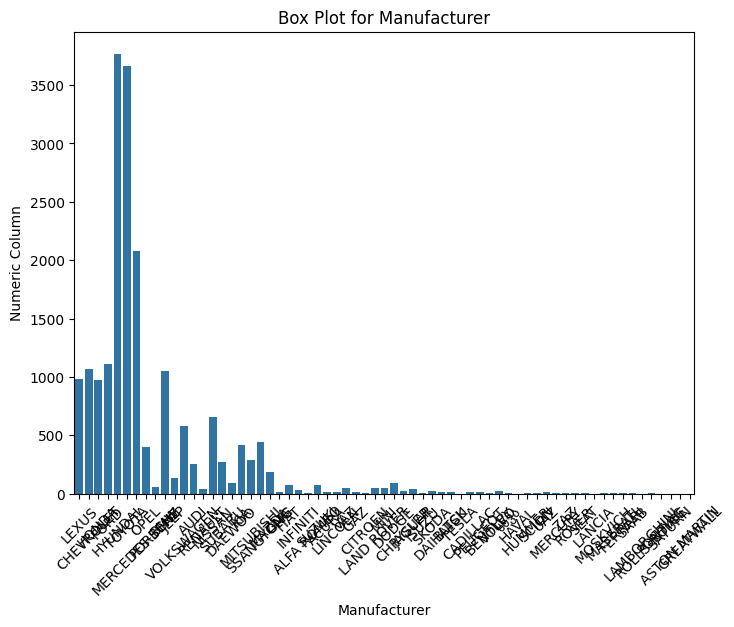

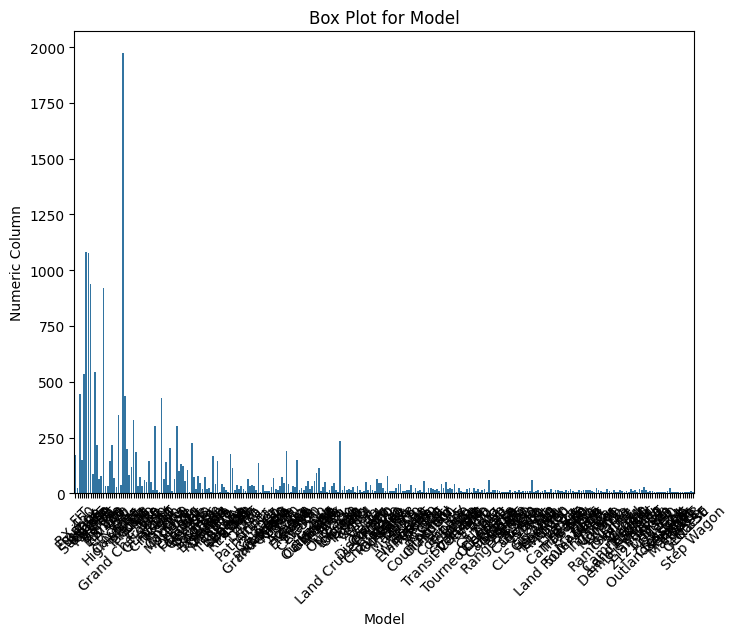

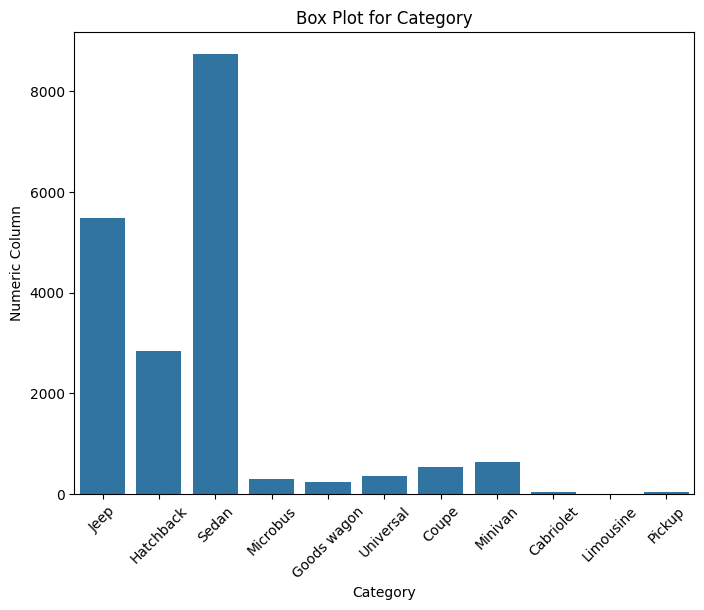

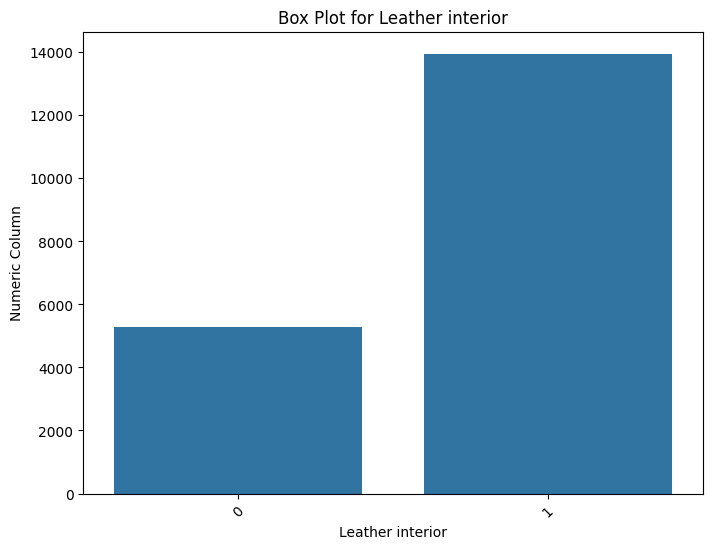

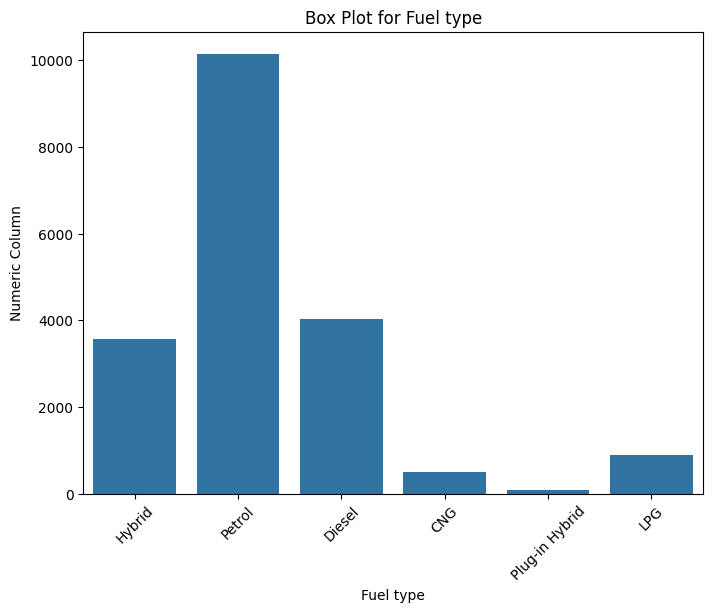

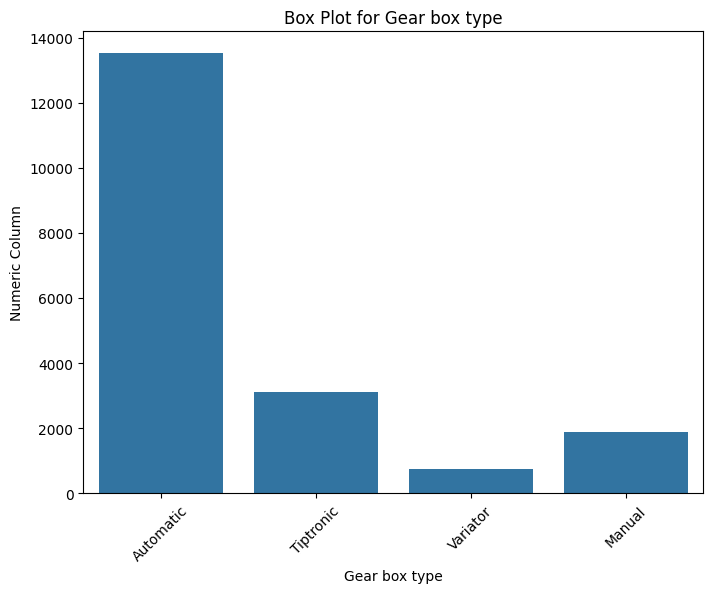

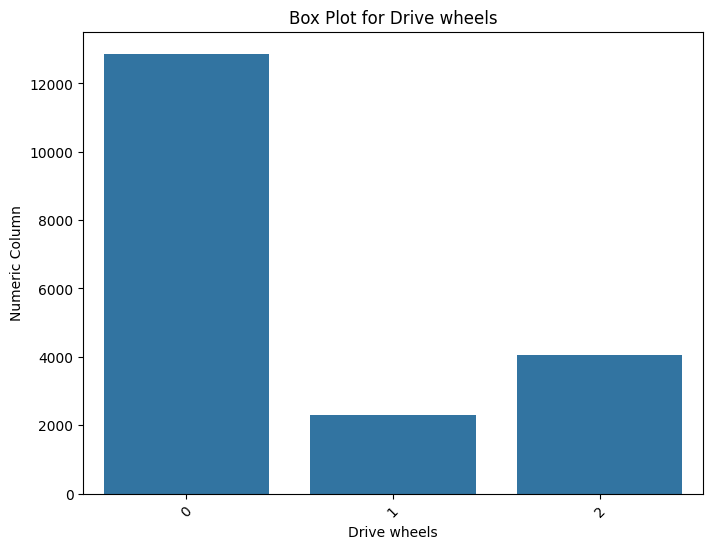

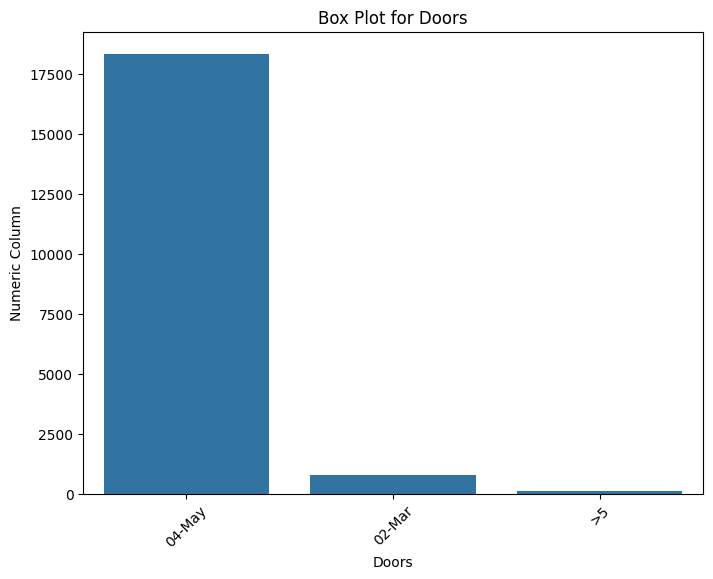

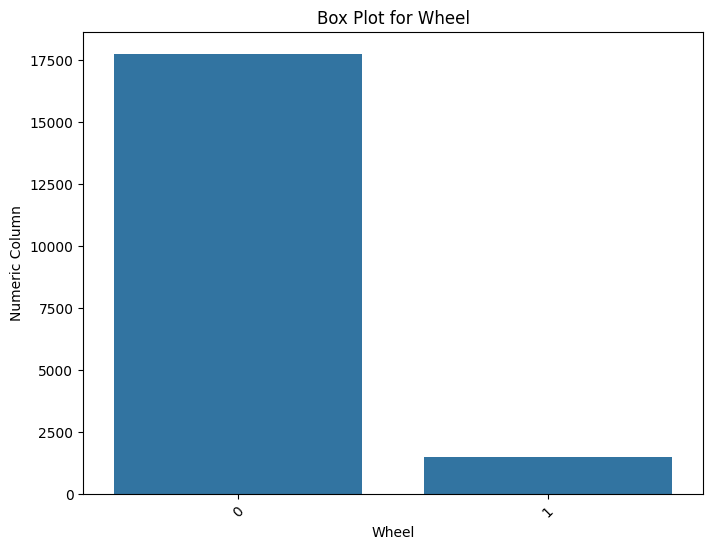

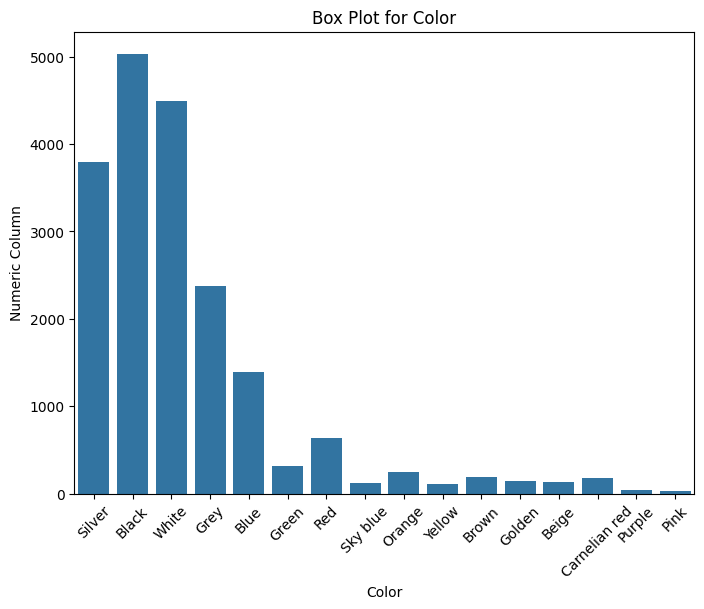

In [43]:
categorical_columns = ["Manufacturer", "Model", "Category", "Leather interior", "Fuel type", "Gear box type", "Drive wheels", "Doors", "Wheel", "Color"]

for column in categorical_columns:
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.countplot(x=column, data=df3)
    plt.title(f"Box Plot for {column}")
    plt.xlabel(column)
    plt.ylabel("Numeric Column")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19236 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19236 non-null  int64  
 1   Levy              19236 non-null  int64  
 2   Manufacturer      19236 non-null  object 
 3   Model             19236 non-null  object 
 4   Category          19236 non-null  object 
 5   Leather interior  19236 non-null  int64  
 6   Fuel type         19236 non-null  object 
 7   Engine volume     19236 non-null  float64
 8   Mileage           19236 non-null  float64
 9   Cylinders         19236 non-null  float64
 10  Gear box type     19236 non-null  object 
 11  Drive wheels      19236 non-null  int64  
 12  Doors             19236 non-null  object 
 13  Wheel             19236 non-null  int64  
 14  Color             19236 non-null  object 
 15  Airbags           19236 non-null  int64  
 16  Lifetime          19236 non-null  int64  
dty

<Axes: xlabel='Price'>

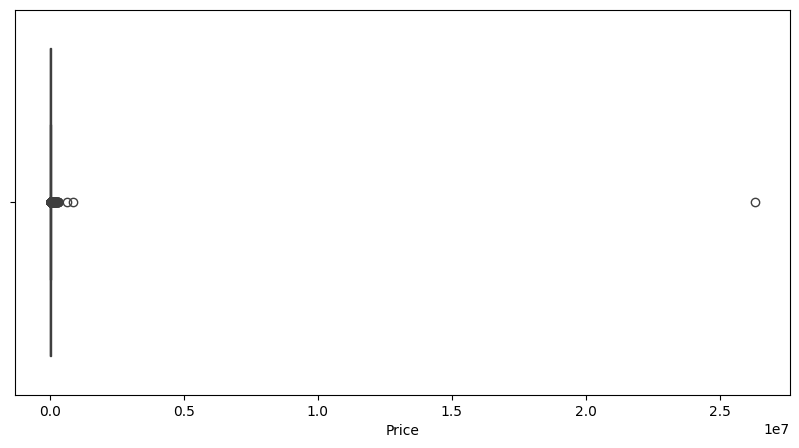

In [45]:
#draw the boxplot
plt.figure(figsize=(10,5));
sns.boxplot(x=df3['Price'])

**Drop the outliers**

In [46]:
df3.drop(df3[(df3['Price'] < 300) | (df3['Price'] > 80000)].index, inplace=True)

<ipython-input-46-f1a75e7e0ff7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(df3[(df3['Price'] < 300) | (df3['Price'] > 80000)].index, inplace=True)


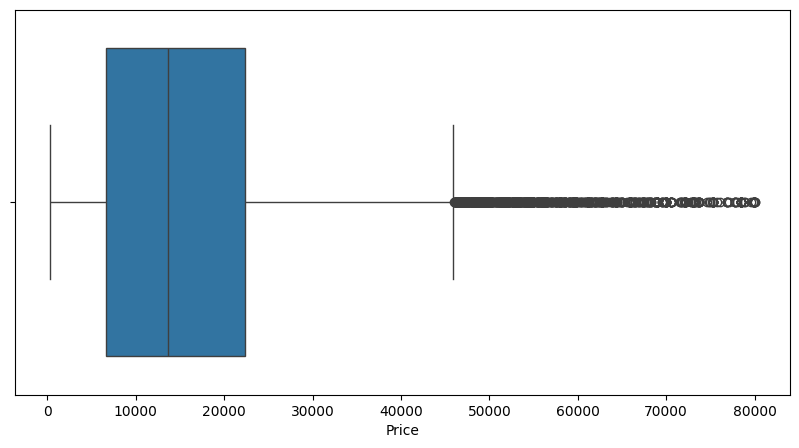

In [47]:
plt.figure(figsize=(10,5));
sns.boxplot(data=df3, x='Price')
plt.show()

**Performing label encoding on the categorical columns**

In [48]:
cat_col = df3.select_dtypes(include=['object']).columns
encoder = preprocessing.LabelEncoder()
for i in range(0, len(cat_col)):
    df3[cat_col[i]] = encoder.fit_transform(df3[cat_col[i]])

<ipython-input-48-ef0bb3833b07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[cat_col[i]] = encoder.fit_transform(df3[cat_col[i]])
<ipython-input-48-ef0bb3833b07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[cat_col[i]] = encoder.fit_transform(df3[cat_col[i]])
<ipython-input-48-ef0bb3833b07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [49]:
df3

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Lifetime
0,13328,1399,30,226,4,1,2,3.5,186005.0,6.0,0,2,1,0,12,12,15
1,16621,1018,7,119,4,0,4,3.0,192000.0,6.0,2,2,1,0,1,8,14
2,8467,0,20,124,3,0,4,1.3,200000.0,4.0,3,0,1,1,1,2,19
3,3607,862,15,120,4,1,2,2.5,168966.0,4.0,0,2,1,0,14,0,14
4,11726,446,20,124,3,1,4,1.3,91901.0,4.0,0,0,1,0,12,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,34,63,1,1,0,2.0,300000.0,4.0,1,1,0,0,12,5,26
19233,15681,831,22,242,9,1,4,2.4,161600.0,4.0,2,0,1,0,11,8,14
19234,26108,836,22,262,4,1,1,2.0,116365.0,4.0,0,0,1,0,7,4,15
19235,5331,1288,7,80,4,1,1,2.0,51258.0,4.0,0,0,1,0,1,4,18


In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18112 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18112 non-null  int64  
 1   Levy              18112 non-null  int64  
 2   Manufacturer      18112 non-null  int64  
 3   Model             18112 non-null  int64  
 4   Category          18112 non-null  int64  
 5   Leather interior  18112 non-null  int64  
 6   Fuel type         18112 non-null  int64  
 7   Engine volume     18112 non-null  float64
 8   Mileage           18112 non-null  float64
 9   Cylinders         18112 non-null  float64
 10  Gear box type     18112 non-null  int64  
 11  Drive wheels      18112 non-null  int64  
 12  Doors             18112 non-null  int64  
 13  Wheel             18112 non-null  int64  
 14  Color             18112 non-null  int64  
 15  Airbags           18112 non-null  int64  
 16  Lifetime          18112 non-null  int64  
dty

In [51]:
#splitting df3 into two parts: the feature matrix X and the target variable y

X = df3.drop(columns=['Price'])
y = df3['Price']

In [52]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

# feature selection
FeatureSelection = SelectKBest(score_func= chi2 ,k=16)
x = FeatureSelection.fit_transform(X, y)

 **Split data into training and testing sets**

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=195, shuffle =True)

In [54]:
#using the XGBoostRegressor model to perform regression and evaluate its performance on both the training and testing data
#create an instance of the XGBoostRegressor model with the hyperparameters
XGBModel = XGBRegressor(n_estimators=100, max_depth=11, eta=0.09, subsample=0.6, colsample_bytree=0.8)
XGBModel.fit(X_train, y_train)

print('XGBoost Regressor Train Score is : ' , XGBModel.score(X_train, y_train))
print('XGBoost Regressor Test Score is : ' , XGBModel.score(X_test, y_test))

XGBoost Regressor Train Score is :  0.9530320763587952
XGBoost Regressor Test Score is :  0.7948780059814453


In [55]:
#using the RandomForestRegressor model to perform regression and evaluate its performance on both the training and testing data
#create an instance of the RandomForestRegressor model with the hyperparameters
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=14, random_state=0)
RandomForestRegressorModel.fit(X_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))

Random Forest Regressor Train Score is :  0.9195431507472959
Random Forest Regressor Test Score is :  0.7846275584720431


In [56]:
#using the GradientBoostingRegressor model to perform regression and evaluate its performance on both the training and testing data
#create an instance of the GradientBoostingRegressor model with the hyperparameters
GBRModel = GradientBoostingRegressor(n_estimators=400,max_depth=9,learning_rate = 0.08,random_state=33)
GBRModel.fit(X_train, y_train)
print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))

GBRModel Train Score is :  0.9722741378142497
GBRModel Test Score is :  0.8041780053819351


In [57]:
import pickle

In [58]:
with open('carpredictor.pickle' , 'wb') as file:
  pickle.dump(GBRModel, file)

In [59]:
X.columns

Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags', 'Lifetime'],
      dtype='object')

In [60]:
GBRModel.predict([[420, 6, 119, 4, 0, 1, 3.0, 312457.0 ,6.0, 2, 2, 1, 1,2,8,10]])

array([59146.04421827])